In [68]:
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [69]:
# load data
data = pd.read_csv('../data/Train_call.txt', sep='\t', header=0, )
data = np.transpose(data)
label = pd.read_csv('../data/Train_clinical.txt', sep='\t', index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Chromosome,1,1,1,1,1,1,1,1,1,1,...,23,23,23,23,23,23,23,23,23,23
Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,2481927,...,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,2562342,...,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
Nclone,3,4,4,5,13,96,45,4,104,14,...,159,20,6,64,5,57,4,55,5,43
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


Text(0.5, 1.0, 'Heat map of raw data')

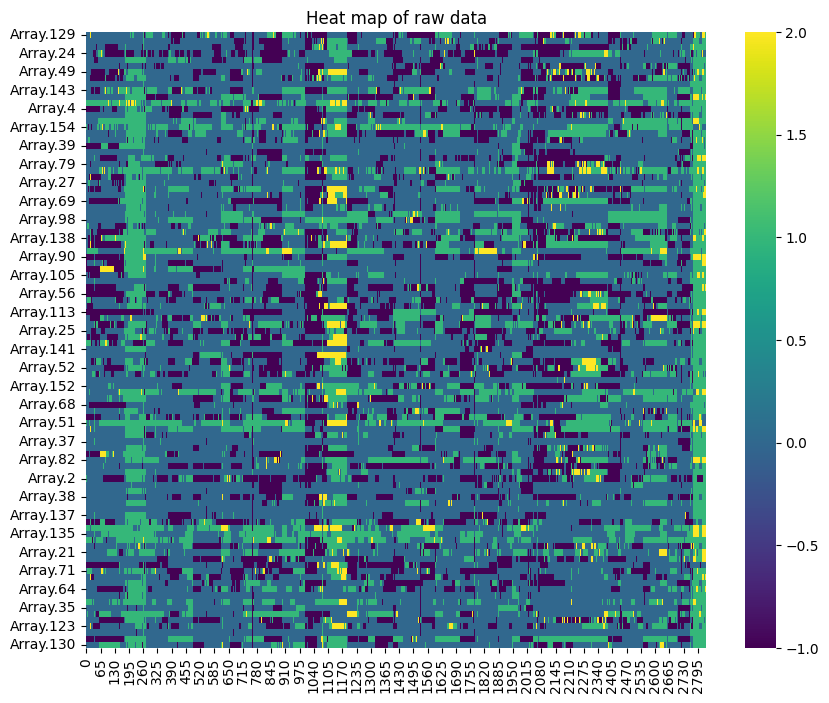

In [70]:
# heat map of raw data
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[4:], cmap='viridis')
plt.title('Heat map of raw data')

          0         1         2         3         4         5         6     \
0     1.000000  0.832444  0.643756  0.434423  0.486919  0.604184  0.621431   
1     0.832444  1.000000  0.808935  0.597492  0.628435  0.755348  0.725528   
2     0.643756  0.808935  1.000000  0.776727  0.797182  0.935191  0.898271   
3     0.434423  0.597492  0.776727  1.000000  0.845499  0.727859  0.699123   
4     0.486919  0.628435  0.797182  0.845499  1.000000  0.863848  0.829744   
...        ...       ...       ...       ...       ...       ...       ...   
2829 -0.154816 -0.067781  0.065592  0.132468  0.057819  0.066849  0.064210   
2830 -0.189968 -0.106853  0.017665  0.080779  0.015572  0.022059  0.021188   
2831 -0.186879 -0.099286  0.019781  0.077556  0.017437  0.024701  0.023726   
2832 -0.135527 -0.056711  0.058167 -0.045097  0.051274  0.059570  0.057219   
2833 -0.141649 -0.062016  0.060013  0.121202  0.052901  0.061164  0.058749   

          7         8         9     ...      2824      2825    

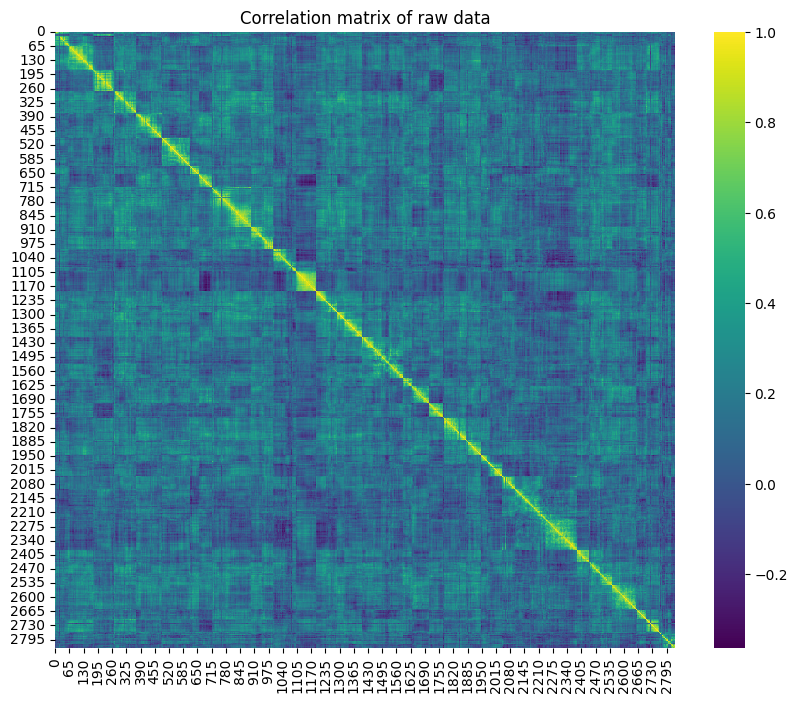

In [71]:
# correlation matrix for each gene
corr_matrix = data.iloc[4:].corr(method='pearson') 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis')
plt.title('Correlation matrix of raw data')
print(corr_matrix)

In [72]:
df_X = data.drop(['Chromosome', 'Start', 'End', "Nclone"])

X = np.array(df_X, dtype=np.float64)

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit label encoder and return encoded labels
label['subgroup_encoded'] = le.fit_transform(label['Subgroup'])

# Now df['subtype_encoded'] contains the encoded labels which can be used for modeling
y = label['subgroup_encoded']

print(df_X)


           0     1     2     3     4     5     6     7     8     9     ...  \
Array.129     0     0     0     0     0     0     0     0     0     0  ...   
Array.34      0     0     0     0     0     0     0     0     0     0  ...   
Array.67      0     0     0     0     0     0     0     0     0     0  ...   
Array.24      0     0     0     0     0     0     0    -1     0     0  ...   
Array.22      0     0     0     0     0     0     0     0     0     0  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
Array.10      0     0     0     0     0     0     0     0     0     0  ...   
Array.123     0     0     0     0     0     0     0     0     0     0  ...   
Array.100     0     0     0     0     0     0     0     0     0     0  ...   
Array.134    -1    -1    -1    -1    -1    -1    -1    -1    -1    -1  ...   
Array.130     0     0     0     0     0     0     0     0     0     0  ...   

           2824  2825  2826  2827  2828  2829  2830  2831  2832

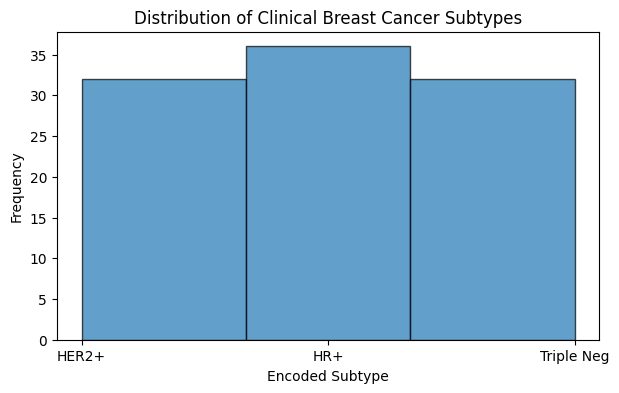

In [73]:
categories = ["HER2+", "HR+", "Triple Neg"]

# Histogram of the labels
plt.figure(figsize=(7, 4))  
plt.hist(y, bins=len(set(y)), alpha=0.7, edgecolor='black')  # Creates the histogram
plt.title('Distribution of Clinical Breast Cancer Subtypes')  # Adds a title
plt.xlabel('Encoded Subtype')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.xticks(range(len(categories)), categories)  # Ensures there is a tick for each class
plt.show()  # Displays the plot

In [74]:
# Convert numpy arrays to pandas DataFrames
df_y = pd.DataFrame(y)

# Write the DataFrames to CSV files
df_X.to_csv('../data/X.csv', index=True)
df_y.to_csv('../data/y.csv', index=True)
